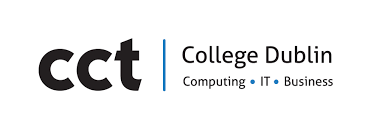

# Strategic Analysis
### Strategic Business Information Technology & Problem Solving for Industry (Capstone Project)
Lecturers: Ken Healy & Muhammad Iqbal

Students: Luiza Cavalcanti Albuquerque Brayner (2020309) & Edgard Pacheco (2020332)

<p> The used dataset was gathered from: <a> https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease </a></p>
<p> GitHub collaboration link: <a> https://github.com/luizaalbuquerque/Strategic-Analysis.git </a></p>

<b> Solutions, Findings, and Demonstrations.</b>



<h3> Notebook Contents </h3>
<p> Dataset importing and information </p>
<p> Exploratory Data Analysis (EDA) </p>
<p> Summary of EDA fidings and visualization </p>
<p> Training and Modeling </p>
<p> Running Application Prototype </p>
<p> Conclusion and findings </p>
<h3> Insights </h3>
<p> Data Visualization </p>
<p> Data Scaling </p>
<p> Statistical Tests for Feature Engineering </p>
<p> Modeling and visualization of results for algorithms </p>


<h2> Introduction </h2>
<p> Ref.[15 & 16]</p>
<p> In this part of the project, we will be providing a comprehensive solution for a personalized health track and disease risk prediction application. We will demonstrate our data collection, cleanning and visualization  of the fidings, AI models to be used, providing a clear overview of our innovative approach. In this project, we will focus over the prediction of a specific risk of developing heart diseases, by making use of predictive models, we will make a comparison of some model's performance in making such prediction, and justification of the selection of the final model. </p>
<h3> Problem Statement </h3>
<p> With the rise over the availability of Data Science, some startups are taking up the challenge of attempting to create indicators for estimating diseases that might be developed. Some of those diseases, requires early detection and management, when machine learning can be of great help. In this way, we try to solve automate another problem that occurs in the nature. </p>
<h4> Aim </h4>
<p> To classify/predict wheather a user is prone to acquiring certain disease (heart disease, in this case), depending on multiple attributes, such as their daily habits. </p>
<p> It is a <b>predictive classification </b>with multiple numerical and categorical features. </p>

<h3> Data Gathering Process </h3>
<p> Ref.[1]</p>
<p> User data, will be gathered by a dataset that is previosly done, with some information that would be gathered from the user's input. All user data currently being analysed is fictional, and in the future could be altered to appropriately match the application goals, which offers options for manual input, and therefore provide a personalized response to better user experience. There will also be an upfront form that will be required for user input of personal and health data, that is where the data will come from to do the first prediction. But for testing purposes, we will be training the models over a fictional dataset, due to ethical and privacy issues, reported over the documentation. </p>

In [ ]:
# Importing Necessary Libraries
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation
import random  # for generating random numbers
import seaborn as sns  # for data visualization
import matplotlib.pyplot as plt  #  for plotting graphs

from sklearn.compose import ColumnTransformer  # Transformer for different columns
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif  # Feature selection tools
from sklearn.impute import SimpleImputer  # Imputer for missing data
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.metrics import (
    accuracy_score, auc, classification_report, confusion_matrix,
    RocCurveDisplay, roc_auc_score, roc_curve
)  # Metrics for model evaluation
from sklearn.model_selection import (
    cross_val_score, RepeatedStratifiedKFold, train_test_split
)  # Tools for data splitting and cross-validation
from sklearn.pipeline import Pipeline, make_pipeline  # Creating model pipelines
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler  # Data preprocessing tools
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier

# Installation of scikit-learn - one time run
# !pip install -U scikit-learn


In [ ]:
# Loading the data from a previous dataset
df = pd.read_csv('heart_2020_cleaned.csv')

# Printing first few rows of the dataset to be analysed - for checking dataset features
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


<h3> Explanation of the code provided above to gather user data </h3>
<p> Ref.[2] </p>
<p> <b> 1. Collecting user data:</b> The main idea is to output a form where the user can input it's own health data and personal data, but for testing purposes as said above, we will be creating such data.</p>
<p> <b> 2. Storing the data:</b> The data is gathered from a previous dataset and then adapted to our own usage, excluding columns that will not be in usage for the analyses. The data is then stored temporarely in a variable. Again, this phase will be implemented in a foward prototype, for testing purpose, we will ultilise an extisting fictional dataset. </p>
<p> <b> 3. Writting to CSV:</b> In the original idea, the code will also write the collected user data into a CSV file called "user_data.csv". The file is already created, and it writes on the following available roll. But following the test purpose, this step of the data gathering will be delayed for the implementation part. </p>
<p> <b> 4. Confirmation:</b> Again, focusing over the original idea, after the data is added to the CSV file, then there will be a confirmation message, which will indicate that the data has been submited. But for testing purposes, we double check the dataframe, by printting the first few rows and analysing the output. </p>

Dimensions of the dataset: (306236, 18) 

Missing values:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      1
MentalHealth        1
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           1
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64 

Data types:
 HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

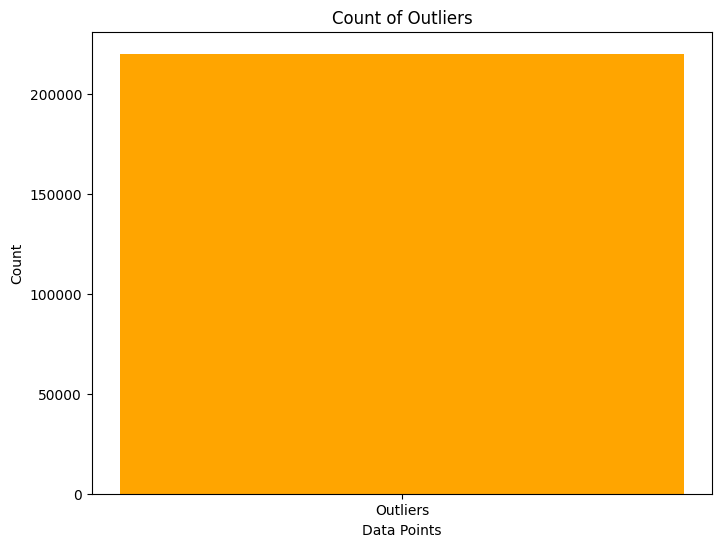

Transpose index and columns:
                      count       mean       std    min    25%    50%    75%  \
HeartDisease      306236.0   0.085898  0.280214   0.00   0.00   0.00   0.00   
BMI               306236.0  28.324422  6.368548  12.02  24.03  27.32  31.45   
Smoking           306236.0   0.414412  0.492621   0.00   0.00   0.00   1.00   
AlcoholDrinking   306236.0   1.068388  0.252425   0.00   1.00   1.00   1.00   
Stroke            306236.0   0.038124  0.191513   0.00   0.00   0.00   0.00   
PhysicalHealth    306235.0   3.381175  7.956373   0.00   0.00   0.00   2.00   
MentalHealth      306235.0   3.924284  7.967935   0.00   0.00   0.00   3.00   
DiffWalking       306236.0   0.138540  0.345476   0.00   0.00   0.00   0.00   
Sex               306236.0   0.475979  0.499430   0.00   0.00   0.00   1.00   
AgeCategory       306236.0   6.524155  3.568196   0.00   4.00   7.00   9.00   
Race              306236.0   4.417495  1.207114   0.00   5.00   5.00   5.00   
Diabetic          3062

In [ ]:

# Output of Dimensions of the Dataset
print("Dimensions of the dataset:", df.shape, "\n")

# Output of Missing values
print("Missing values:\n", df.isnull().sum(), "\n")

# Data types of each feature
print("Data types:\n", df.dtypes, "\n")

# Data columns of full dataset
print("Columns:\n", df.columns, "\n")

# Numerical features
print("Statistics (summary):\n", df.describe(), "\n")

# Creating a new DataFrame from the main dataset
data = pd.DataFrame(df)

# Getting duplicated rows
duplicated_rows = df[df.duplicated(keep=False)]
# print("Duplicated rows:")
# print(duplicated_rows)

# Count duplicated rows and output
duplicated_counts = df.duplicated().sum()

print("Number of duplicated rows:", duplicated_counts)

# Identify outliers
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_count = outliers.sum()
print("Number of outliers:", outliers_count)

# Create a bar plot to show outliers visualization
plt.figure(figsize=(8, 6))
plt.bar(["Outliers"], [outliers_count], color='orange')
plt.xlabel("Data Points")
plt.ylabel("Count")
plt.title("Count of Outliers")
plt.show()

# Check for unique values in categorical columns - data validation
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:", unique_values, "\n")

# transpose values
print("Transpose index and columns:\n", df.describe().T)


<ipython-input-6-53b4398a80db>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_feature], ax=axs[i], palette=colors)
<ipython-input-6-53b4398a80db>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_feature], ax=axs[i], palette=colors)
<ipython-input-6-53b4398a80db>:31: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[cat_feature], ax=axs[i], palette=colors)
<ipython-input-6-53b4398a80db>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

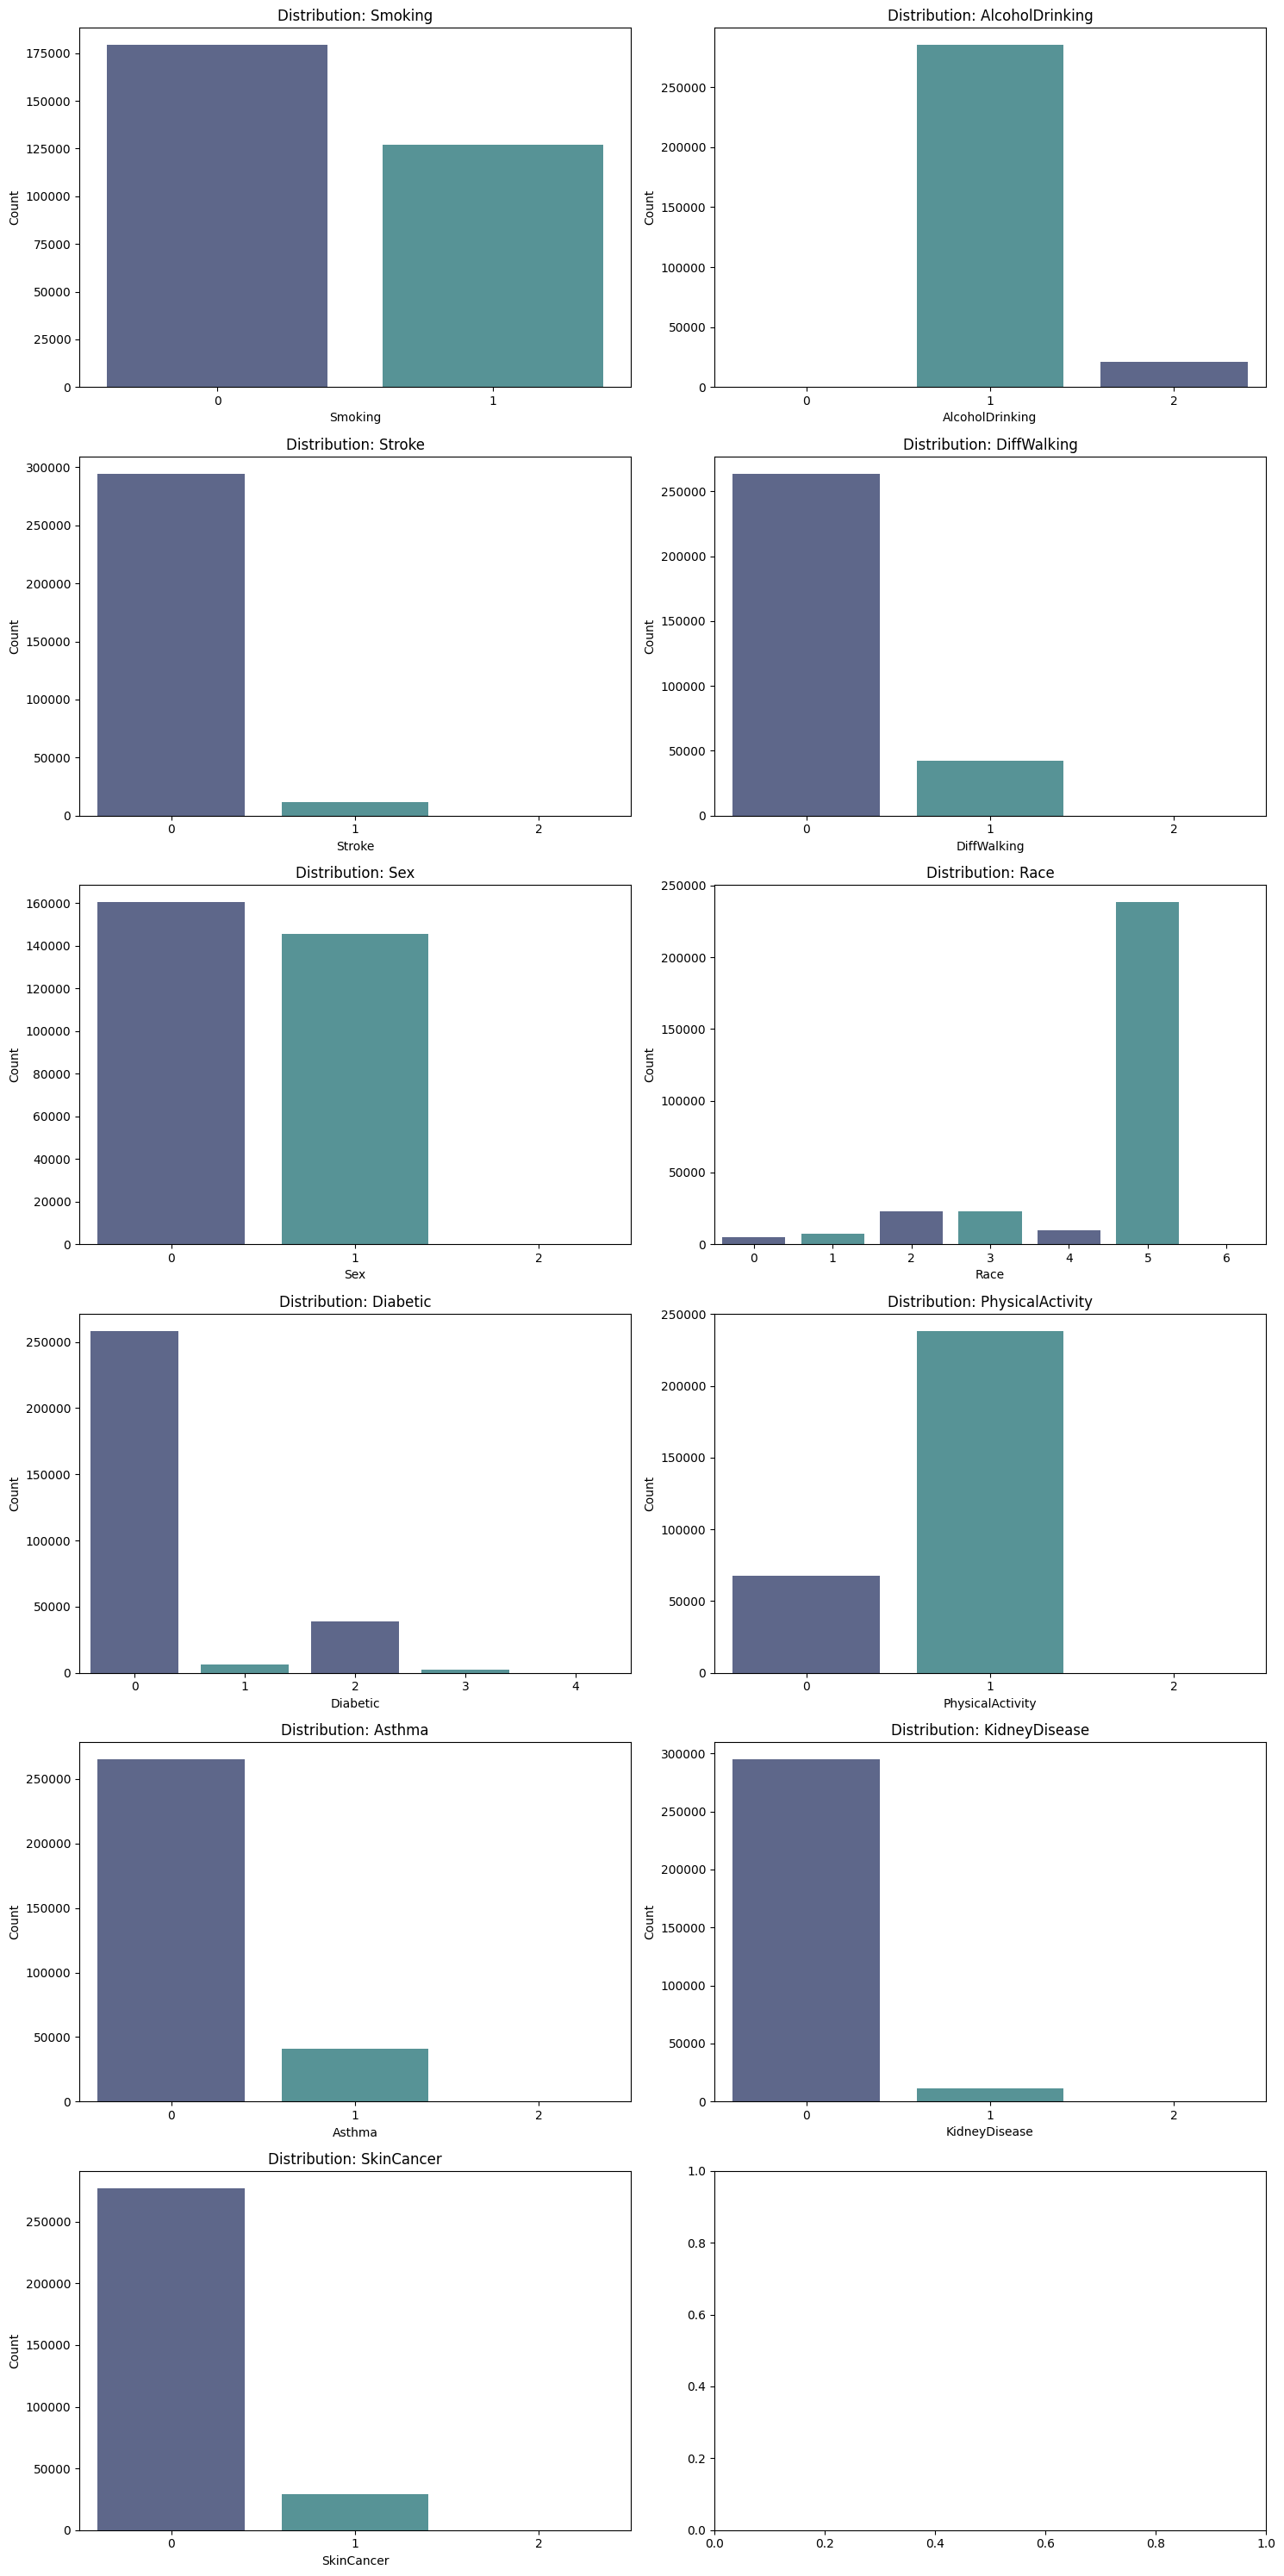

In [ ]:
# Creating a copy of the dataframe
df = df.copy(deep=True)

# Initialize LabelEncoder
le = LabelEncoder()

# Correctly encode categorical columns from the new dataset
df['Smoking'] = le.fit_transform(df['Smoking'])
df['AlcoholDrinking'] = le.fit_transform(df['AlcoholDrinking'])
df['Stroke'] = le.fit_transform(df['Stroke'])
df['DiffWalking'] = le.fit_transform(df['DiffWalking'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Race'] = le.fit_transform(df['Race'])
df['Diabetic'] = le.fit_transform(df['Diabetic'])
df['PhysicalActivity'] = le.fit_transform(df['PhysicalActivity'])
df['GenHealth'] = le.fit_transform(df['GenHealth'])
df['Asthma'] = le.fit_transform(df['Asthma'])
df['KidneyDisease'] = le.fit_transform(df['KidneyDisease'])
df['SkinCancer'] = le.fit_transform(df['SkinCancer'])

# Define categorical features from the actual columns in the dataset
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Set colors for visualization
colors = ['#576291','#4c9ca1']

# Plot distribution of categorical features
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15, 30))
axs = axs.flatten()
for i, cat_feature in enumerate(categorical_features):
    sns.countplot(x=df[cat_feature], ax=axs[i], palette=colors)
    axs[i].set_title('Distribution: ' + cat_feature)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


<p><b>See below the mean: </b>output an visualization of all features for cases of certain diagnosted diseases, in the dataset chosen, there is only reference for 'Cardiovascular diseases' diagnosted disease, making a comparison of not diagnosted disease. </p>

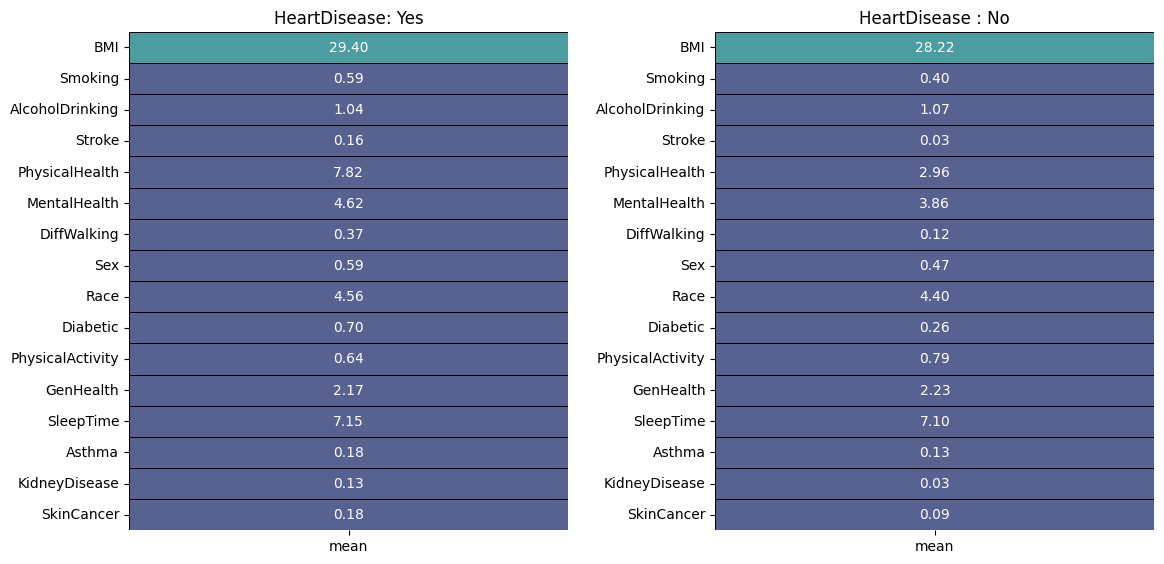

In [ ]:
# Filter individuals with and without diagnosed disease
yes = df[df['HeartDisease'] == 'Yes']
no = df[df['HeartDisease'] != 'Yes']

# Calculate summary statistics for each group
yes_summary = yes.describe().T
no_summary = no.describe().T

# Plot heatmaps
colors = ['#576291','#4c9ca1']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(yes_summary[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('HeartDisease: Yes')

plt.subplot(1, 2, 2)
sns.heatmap(no_summary[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('HeartDisease : No')

fig.tight_layout(pad=2)
plt.show()


<p><b>Categorical and Numerical </b>dividing feaures into categorical and numerical, part of the exploratory data analysis (EDA) step. </p>

In [ ]:
# Dividing features into Numerical and Categorical
col = list(df.columns)

# Array list to append over the loop, list is starting empty
categorical_features = []
numerical_features = []

# Loop through all features to separate them
for i in col:
    if len(df[i].unique()) > 6:
        # if numerical, then append to numerical list
        numerical_features.append(i)
    else:
        # if it is not numerical, append to categorical list
        categorical_features.append(i)

# Output of such results
print('Categorical Features :\n',*categorical_features, '\n')
print('Numerical Features :\n',*numerical_features)

Categorical Features :
 HeartDisease Smoking AlcoholDrinking Stroke DiffWalking Sex Diabetic PhysicalActivity GenHealth Asthma KidneyDisease SkinCancer 

Numerical Features :
 BMI PhysicalHealth MentalHealth AgeCategory Race SleepTime


<p> <b> Explanation of code above:</b>in the provided code, the categorical features are define if the attribute has less than 6 unique elements else it is a numerical feature, typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute. </p>
<p> Eg: datatype = integer, attribute = numerical feature; datatype = string, attribute = categorical feature. </p>
<p> For this dataset, as the number of features are less, but still high, we will try to manually check the dataset as well. Such as: </p>
<p> 1. Create a deep copy of the original dataset and label encoding the text data of the categorical features. </p>
<p> 2. Modifications in the original dataset will not be highlighted in this deep copy. </p>
<p> 3. We can use this deep copy of the dataset that has all the features converted into numerical values for visualization & modeling purposes. </p>
<h3> See below: Manual check of categorical features and distribution of categorical features: </h3>

<ipython-input-10-9ef98f350bec>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_feature], ax=axs[i], palette=colors)
<ipython-input-10-9ef98f350bec>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_feature], ax=axs[i], palette=colors)
<ipython-input-10-9ef98f350bec>:31: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[cat_feature], ax=axs[i], palette=colors)
<ipython-input-10-9ef98f350bec>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

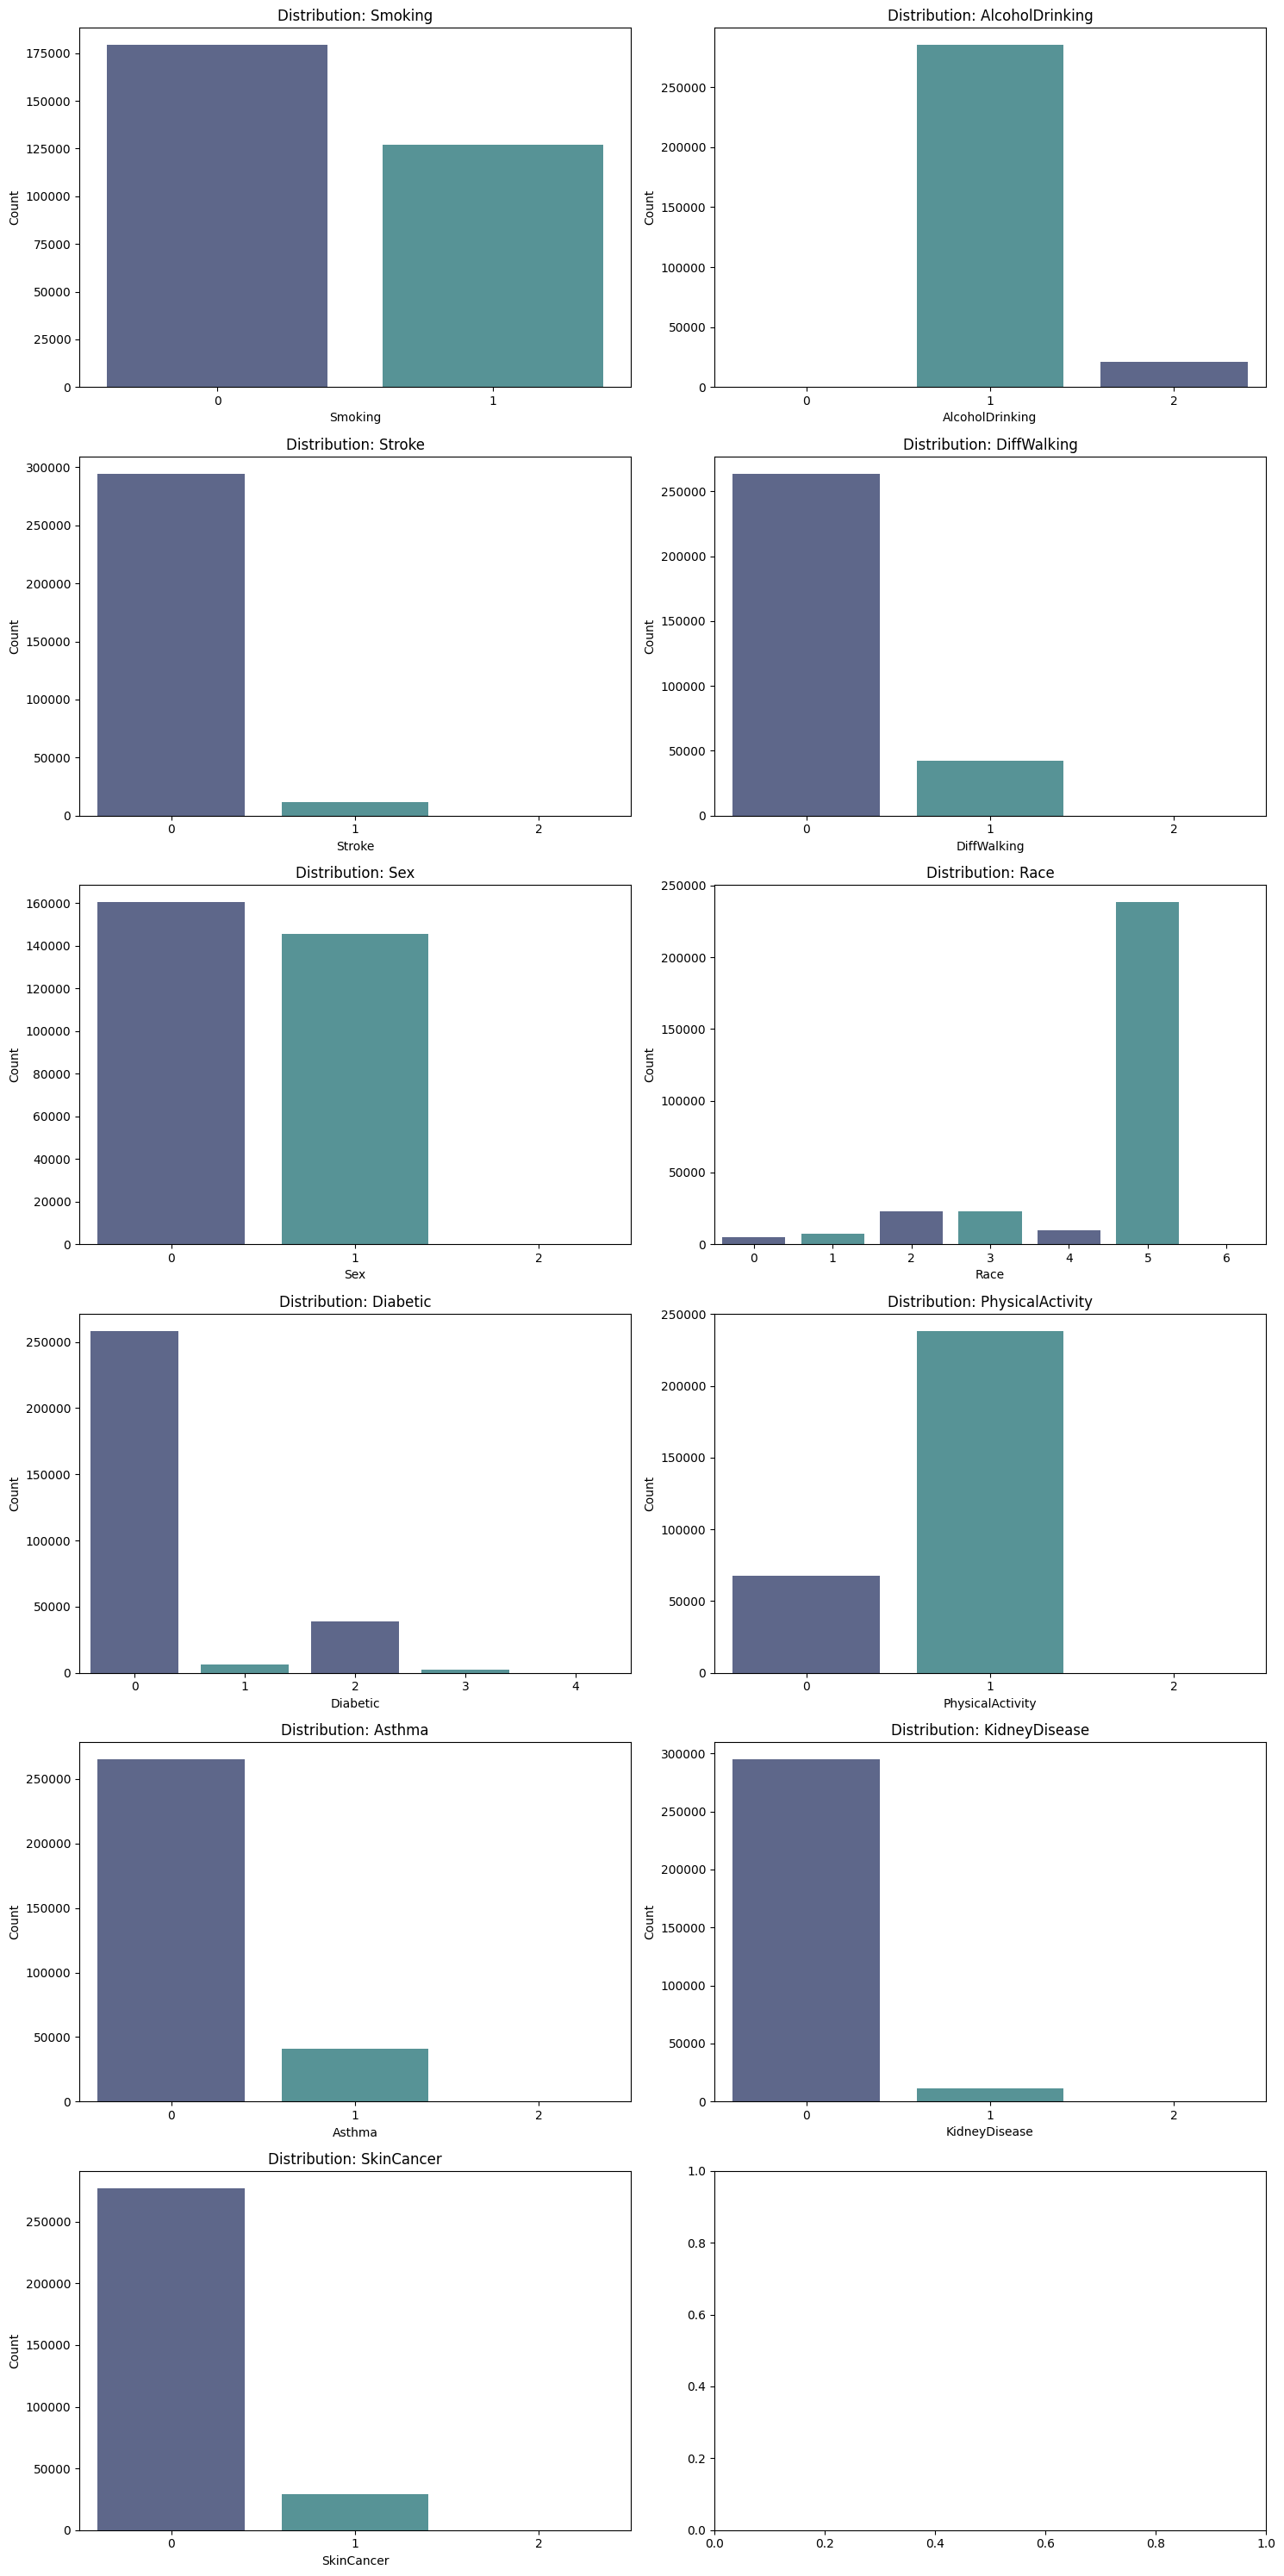

In [ ]:
# Copy the dataframe into df
df = df.copy(deep=True)

# Initialize LabelEncoder
le = LabelEncoder()

# Correctly encode categorical columns from the new dataset
df['Smoking'] = le.fit_transform(df['Smoking'])
df['AlcoholDrinking'] = le.fit_transform(df['AlcoholDrinking'])
df['Stroke'] = le.fit_transform(df['Stroke'])
df['DiffWalking'] = le.fit_transform(df['DiffWalking'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Race'] = le.fit_transform(df['Race'])
df['Diabetic'] = le.fit_transform(df['Diabetic'])
df['PhysicalActivity'] = le.fit_transform(df['PhysicalActivity'])
df['GenHealth'] = le.fit_transform(df['GenHealth'])
df['Asthma'] = le.fit_transform(df['Asthma'])
df['KidneyDisease'] = le.fit_transform(df['KidneyDisease'])
df['SkinCancer'] = le.fit_transform(df['SkinCancer'])

# Define categorical features from the actual columns in the dataset
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Set colors for visualization
colors = ['#576291','#4c9ca1']

# Plot distribution of categorical features
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15, 30))
axs = axs.flatten()
for i, cat_feature in enumerate(categorical_features):
    sns.countplot(x=df[cat_feature], ax=axs[i], palette=colors)
    axs[i].set_title('Distribution: ' + cat_feature)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


<p> <b> Categorical features:</b> they are near about normally distributed, on the exception of plots for 'Race' and 'DiffWalking', suggesting that there may be no data points or very few data points with certain categories in those features, due to several reasons, such as, feature importance, data quality issues, data imbalance, potential bias, data collection considerations, etc, requiring a deeper research and analysis. In summary, the absense of the data in the above distribution plots for certain categorical features makes research essential to solve underlying implications for the analysis. </p>
<p> Ref.[9 & 10]</p>
<p> After extense research, it is possible to analyse that the rates of Heart Disease, and the relation to Race and DiffWalking it might be an important coorelation, therefore, those features were indeed taken into consideration on the following analysis of the data, and adjusted to be given appropriate attention, for further information, it would be needed to gather information from a professional over the healthcare area, for a more guided prototype. </p>

<ipython-input-11-5310e85eab52>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_feature], color=colors[0], ax=ax[i], kde_kws={'bw': 1})
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-11-5310e85eab52>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your 

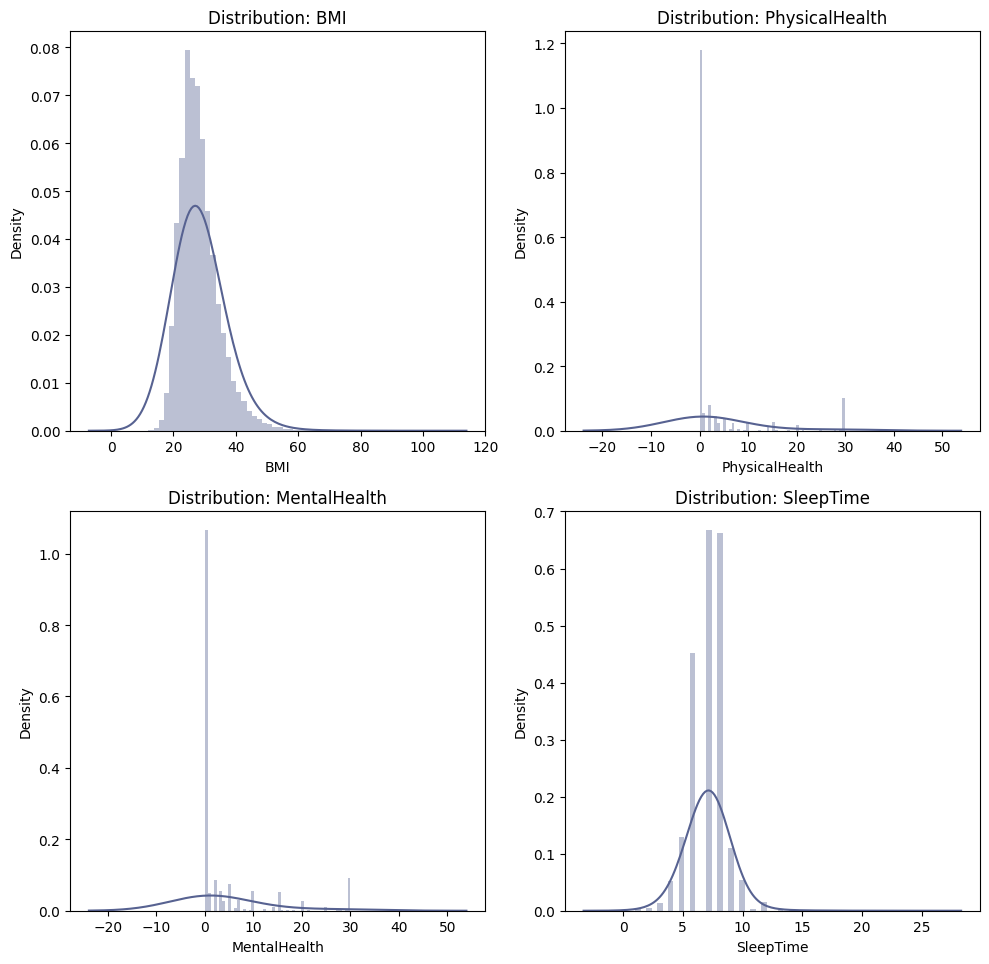

In [ ]:
# Define numerical features from the actual dataset
numerical_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Set colors for visualization
colors = ['#576291','#4c9ca1']

# Plot distribution of numerical features
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 9.75))
ax = ax.flatten()
for i, num_feature in enumerate(numerical_features):
    sns.distplot(df[num_feature], color=colors[0], ax=ax[i], kde_kws={'bw': 1})
    ax[i].set_title('Distribution: ' + num_feature)

plt.tight_layout()
plt.show()


<p> <b> Analyse of the above plots:</b> numerical features,  </p>
<h3> Now let's work with the target variable visualization (HeartDisease): </h3>

<ipython-input-8-8cdc56ea0289>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='HeartDisease', data=df, palette=colors, edgecolor='black')
<ipython-input-8-8cdc56ea0289>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])


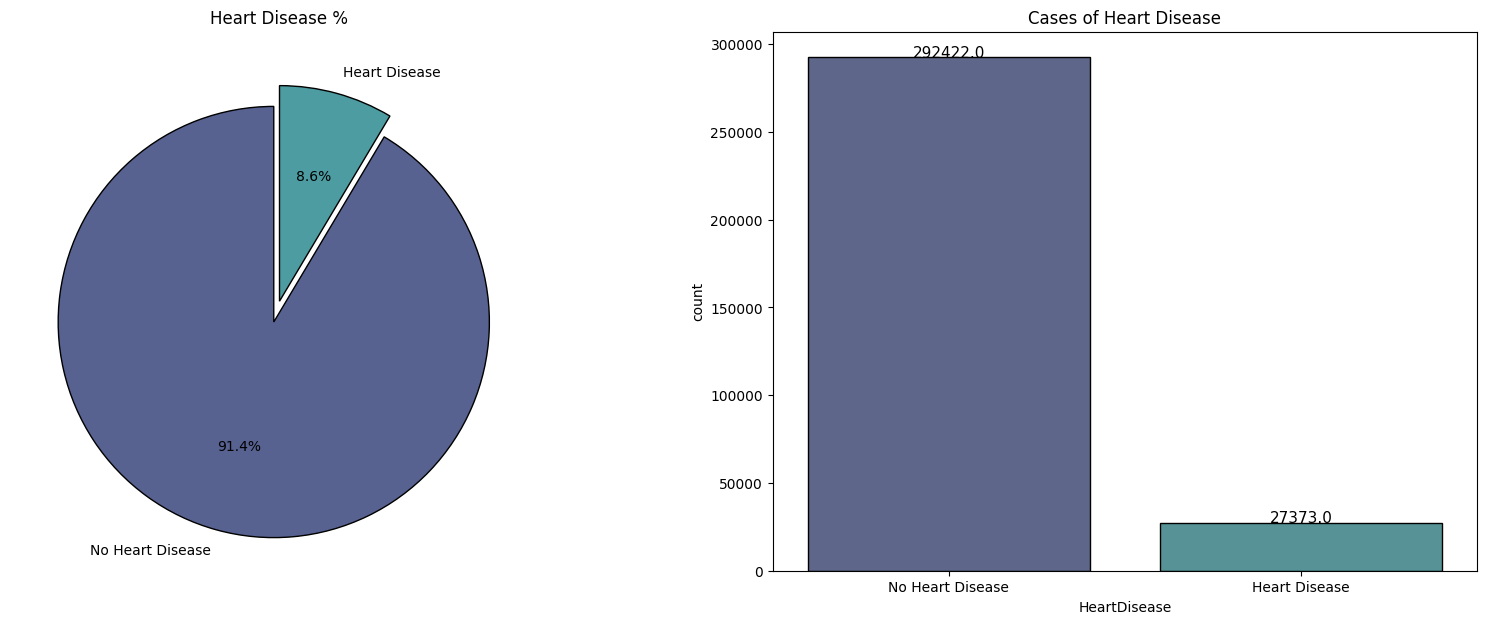

In [ ]:
# Calculating the percentage of each category in the 'HeartDisease' column
values = list(df['HeartDisease'].value_counts())
percentages = [value / sum(values) * 100 for value in values]

# Plot setup
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Pie chart for 'HeartDisease'
plt.subplot(1, 2, 1)
plt.pie(percentages, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')

colors = ['#576291','#4c9ca1']

# Count plot for 'HeartDisease'
plt.subplot(1, 2, 2)
ax = sns.countplot(x='HeartDisease', data=df, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Cases of Heart Disease')

plt.show()

<p> The dataset is unbalanced, but give's a nice overview of general focus data (HeartDisease). </p>
<h3> Categorical Features vs Target Variable (HeartDisease): </h3>

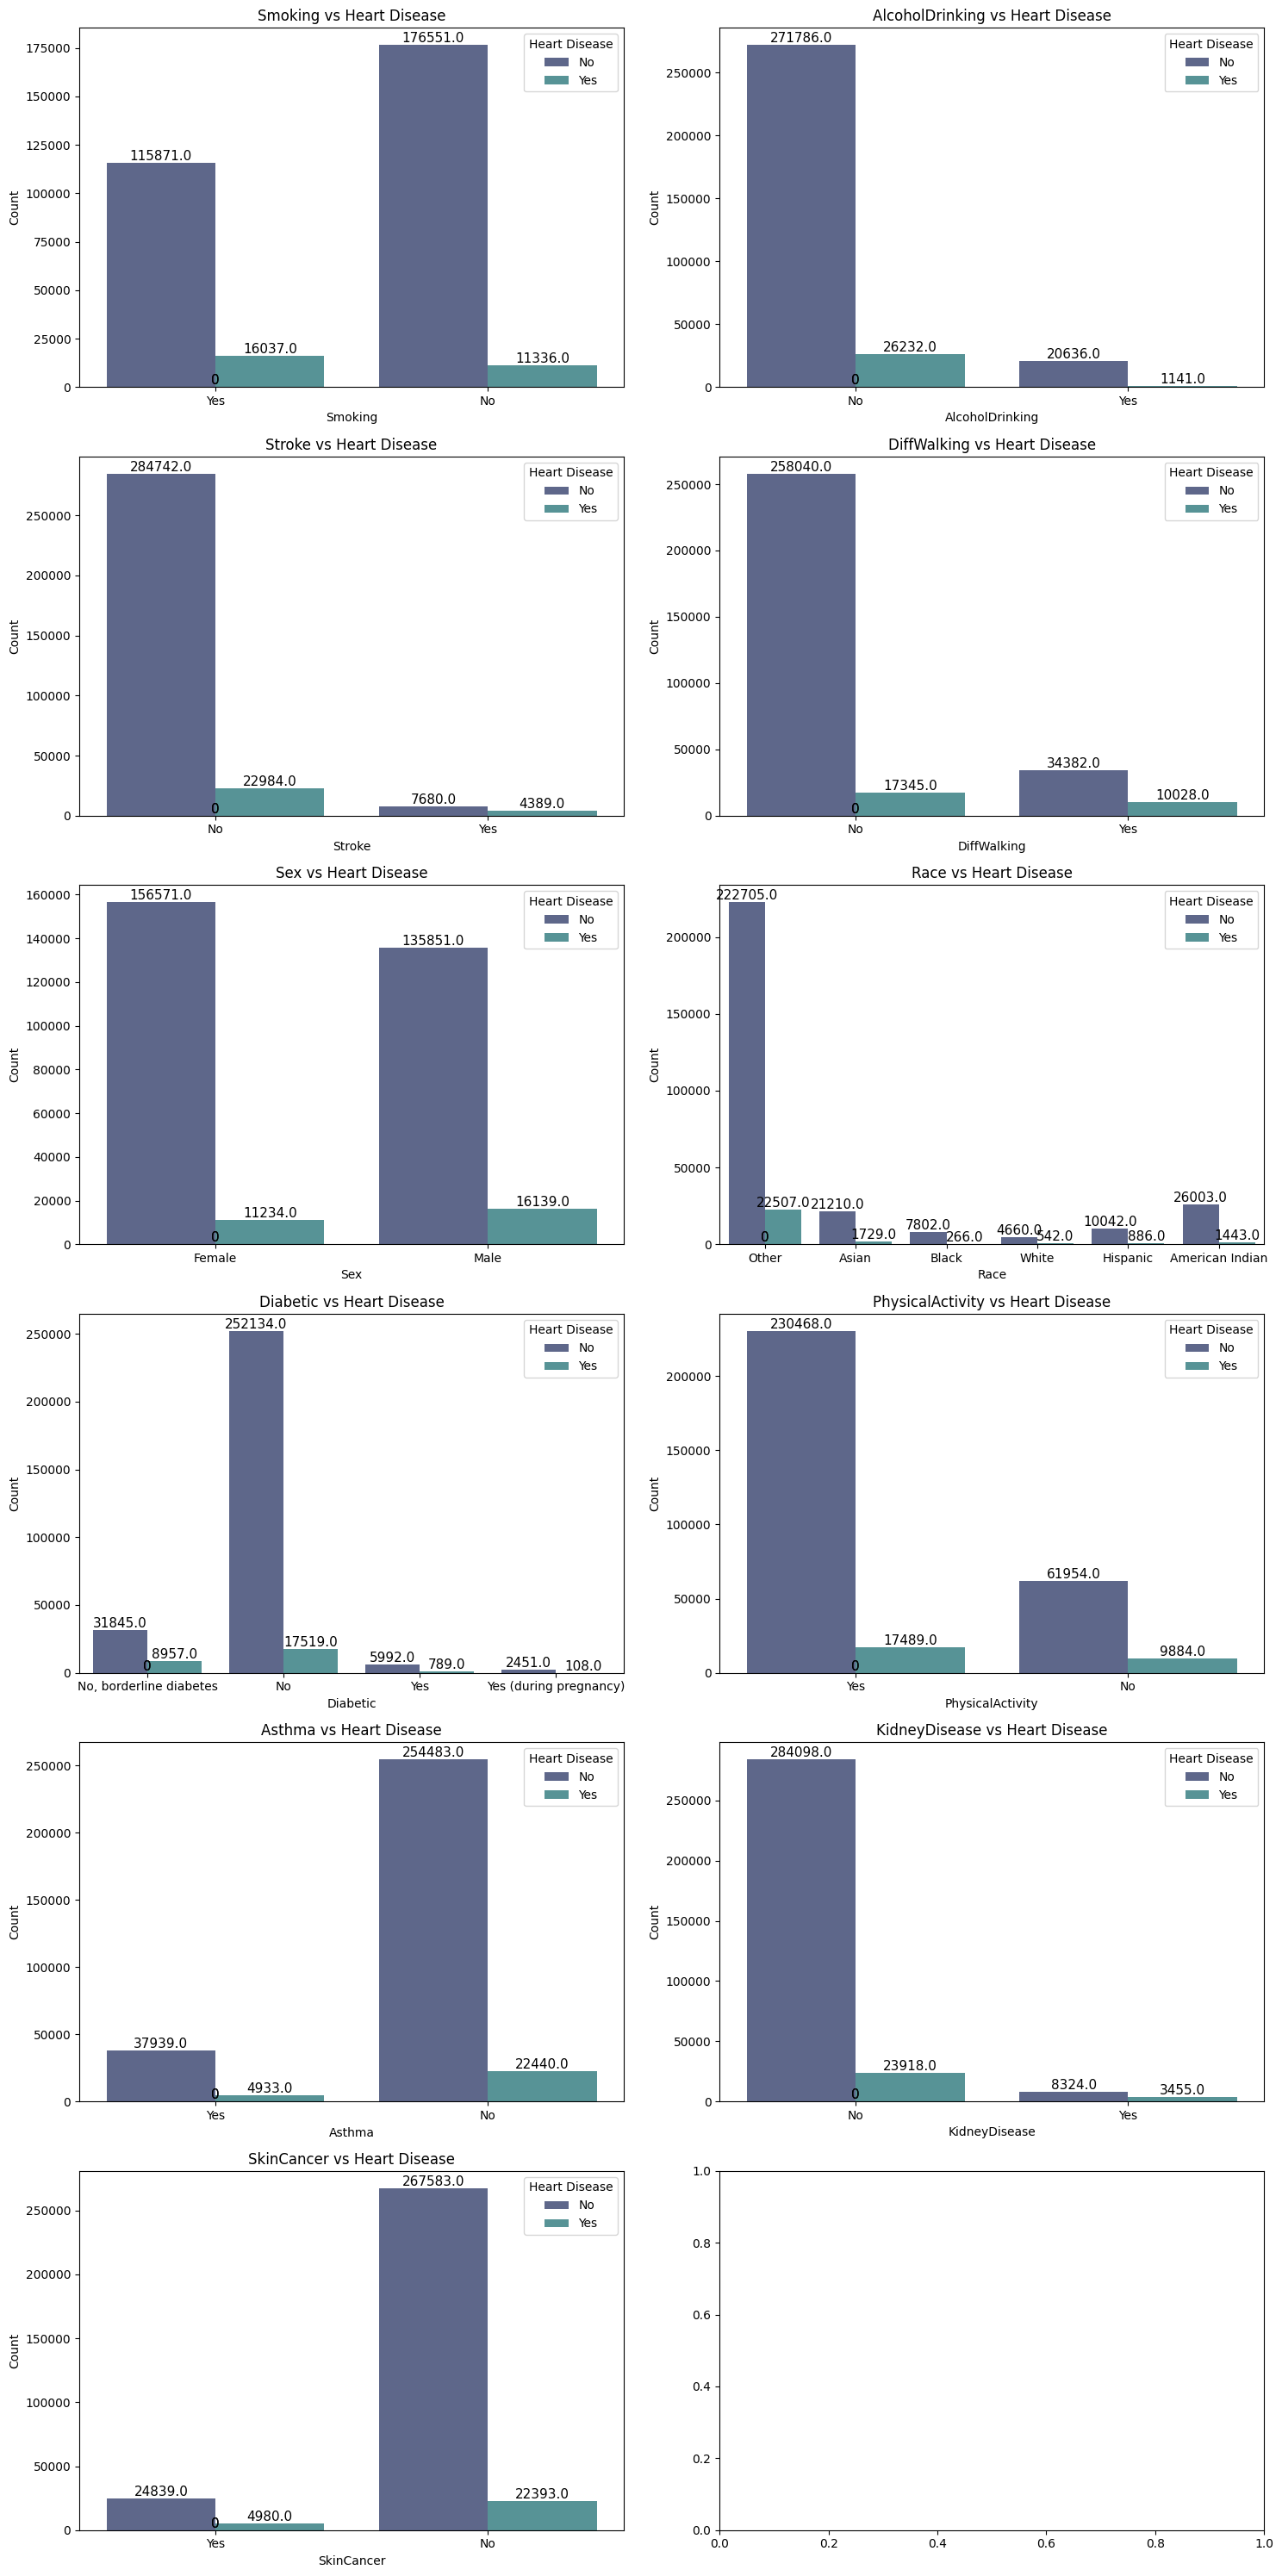

In [ ]:
# Define manual mappings for categorical features
mappings = {
    'Smoking': {0: 'No', 1: 'Yes'},
    'AlcoholDrinking': {0: 'No', 1: 'Yes'},
    'Stroke': {0: 'No', 1: 'Yes'},
    'DiffWalking': {0: 'No', 1: 'Yes'},
    'Sex': {0: 'Female', 1: 'Male'},
    'Race': {0: 'White', 1: 'Black', 2: 'Asian', 3: 'American Indian', 4: 'Hispanic', 5: 'Other'},
    'Diabetic': {0: 'No', 1: 'Yes', 2: 'No, borderline diabetes', 3: 'Yes (during pregnancy)'},
    'PhysicalActivity': {0: 'No', 1: 'Yes'},
    'Asthma': {0: 'No', 1: 'Yes'},
    'KidneyDisease': {0: 'No', 1: 'Yes'},
    'SkinCancer': {0: 'No', 1: 'Yes'}
}

# Encode categorical features as numeric
encoder = LabelEncoder()
for feature in mappings.keys():
    df[feature] = encoder.fit_transform(df[feature])

# Replace numeric values with original labels for plotting
for feature, mapping in mappings.items():
    df[feature] = df[feature].map(mapping)

# Define categorical features for the plot
categorical_features = list(mappings.keys())

# Define colors for visualization
colors = ['#576291','#4c9ca1']

# Calculate the appropriate number of rows and columns for subplots
num_features = len(categorical_features)
num_columns = 2
num_rows = (num_features + num_columns - 1) // num_columns

# Set up the plot
fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 30))
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Plot categorical features against the target variable 'HeartDisease'
for i, feature in enumerate(categorical_features):
    ax = sns.countplot(x=feature, hue='HeartDisease', data=df, palette=colors, ax=axs[i])
    for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 2, f'{height}',
                ha='center', va='bottom', fontsize=11)
    axs[i].set_title(f'{feature} vs Heart Disease')
    axs[i].set_xlabel(feature)  # Add x-axis label
    axs[i].set_ylabel('Count')  # Add y-axis label
    axs[i].legend(title='Heart Disease', labels=['No', 'Yes'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<h3> Fidings of above visualization </h3>
<p> 1. The plots shows that male population has more diagnosed heart diseases patients than female population. In a difference of 4.905 more male diagnosed. </p>
<p> 2. Alcohol consuption over people that drinks has less diagnosed disease (heart disease) than people that do not drink. </p>
<p> 3. Physical Activity is tricky! Patients diagnosed heart diseases are higher over those that performe activities, than those that do not peform physical activities, this could be due to a higher health checks for those that regular do sports, being able to spot the disease earlier. </p>
<p> 4. Smoking vs Heart Disease, the percentage of smokers diagnoses is higher by 4.701 people diagnosed, meaning that smoking actually has a strong relation into acquiring a heart condition disease. </p>

<h3> Explanation of the code provided above to perform a data cleanning EDA (Exploratory Data Analysis) </h3>
<p> Ref.[3] & [8] </p>
<p> <b> 1. Identifying dataset dimentions: </b> The dataset to be used is formulated by 50000 instances and 14 features/attributes. Regarding the dimensions of the final dataset (specifically rows and columns), it was possible to ensure that all data was loaded corretly. </p>
<p> <b> 2. Identifying missing values: </b> By making use of '.isnull()' method, it was possible to identify missing values and then count them with the '.sum()' method to check missing values in each column. It is also possible to check that there was no records of missing values, but important to highlight that the values were also filled by 0, null and 'none' variables. Therefore, needing a deeper analysis over that. </p>
<p> <b> 3. Checking data types:</b> There was a check done for all data types, it was used 'df.dtypes' to recognize all different data types to be used on the analysis and model training, over this step it was also implemented an check for columns of the dataset, for a deeper look over the general data available. </p>
<p> <b> 4. Identifying and handling duplicated values:</b> It was done a deeper analysis over the duplicated values, the duplicated values returned an empty dataframe on the first try, which meant that there was no duplicated rows. Secondly it was requested a count of such repeted values, which then returned 18078. </p>
<p> <b> 5. Checking for data normalization and inconsistent values:</b> This step was also done while checking the data types, which included an overview of full DataFrame data types for further analysis. See output of code above for further details. </p>
<p> <b> 6. Identifying outliers:</b> It was creted over the last few lines of code an outliers detection and count, printing 0 on the output, as well as no outliers appered over the visualization, it was also created a graph to visualize such data, but no outliers were shown. </p>
<p> <b> 7. Transpose:</b> Index and columns, which will reflect the DataFrame over its main diagonal by writting rows as columns and vice-versa. Basically to obtain the transpose of an given array. It was needed to transpose the data frame in order to study it more accurately.</p>
 <p> <b> 8. Data Validation </b> This step of the data cleaning was done a check for unique values by the end of †he code so far it was done just to give a general idea of the data to be used. This step outputed unique values found in Gender, Alcohool Consumption, Physical Activity, Smoking habits, and Heart Disease. Such values were broken down and outputed together with each category.</p>

<h3> Feature Engineering </h3>
<p> Data Scaling </p>

In [ ]:
# Create scaler objects
mms = MinMaxScaler()  # For normalization
ss = StandardScaler()  # For standardization

# Applying scaling to the numerical features
df['BMI'] = mms.fit_transform(df[['BMI']])
df['PhysicalHealth'] = ss.fit_transform(df[['PhysicalHealth']])
df['MentalHealth'] = ss.fit_transform(df[['MentalHealth']])
df['SleepTime'] = mms.fit_transform(df[['SleepTime']])

# Display the first few rows of the updated DataFrame to check the transformed data
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,0.055294,Yes,No,No,-0.046751,3.281069,No,Female,55-59,Other,"No, borderline diabetes",Yes,4,0.173913,Yes,No,Yes
1,No,0.100447,No,No,Yes,-0.424070,-0.490039,No,Female,80 or older,Other,No,Yes,4,0.260870,No,No,No
2,No,0.175782,Yes,No,No,2.091388,3.281069,No,Male,65-69,Other,"No, borderline diabetes",Yes,1,0.304348,Yes,No,No
3,No,0.147169,No,No,No,-0.424070,-0.490039,No,Female,75-79,Other,No,No,2,0.217391,No,No,Yes
4,No,0.141132,No,No,No,3.097572,-0.490039,Yes,Female,40-44,Other,No,Yes,4,0.304348,No,No,No


<h3> Observations of the above Feature Engineering (Data Scaling) </h3>
<p> Ref.[11] </p>
<p> Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. So to scale data is necessary. </p>
<p> Eg: Age = Years </p>
<p> We have 2 options for data scaling: nomalization or standardization. As most of the algorithms assume the data to be normally (Gaussian) distributed. (about the mean, symmetric, showing that data near the mean are more frequent in occurence.). Normalization is done for features whose data does not display normal distribution and standardization is done for features that are normally distributed where their values are huge or very small as compared to other features. </p>
<p> Normalization: Features that where normalized had displayed skewed data distribution. </p>
<p> Standardization: Age, Smoking, and other features are scaled down because those features are normally distributed. </p>
<h3> Correlation Matrix: </h3>

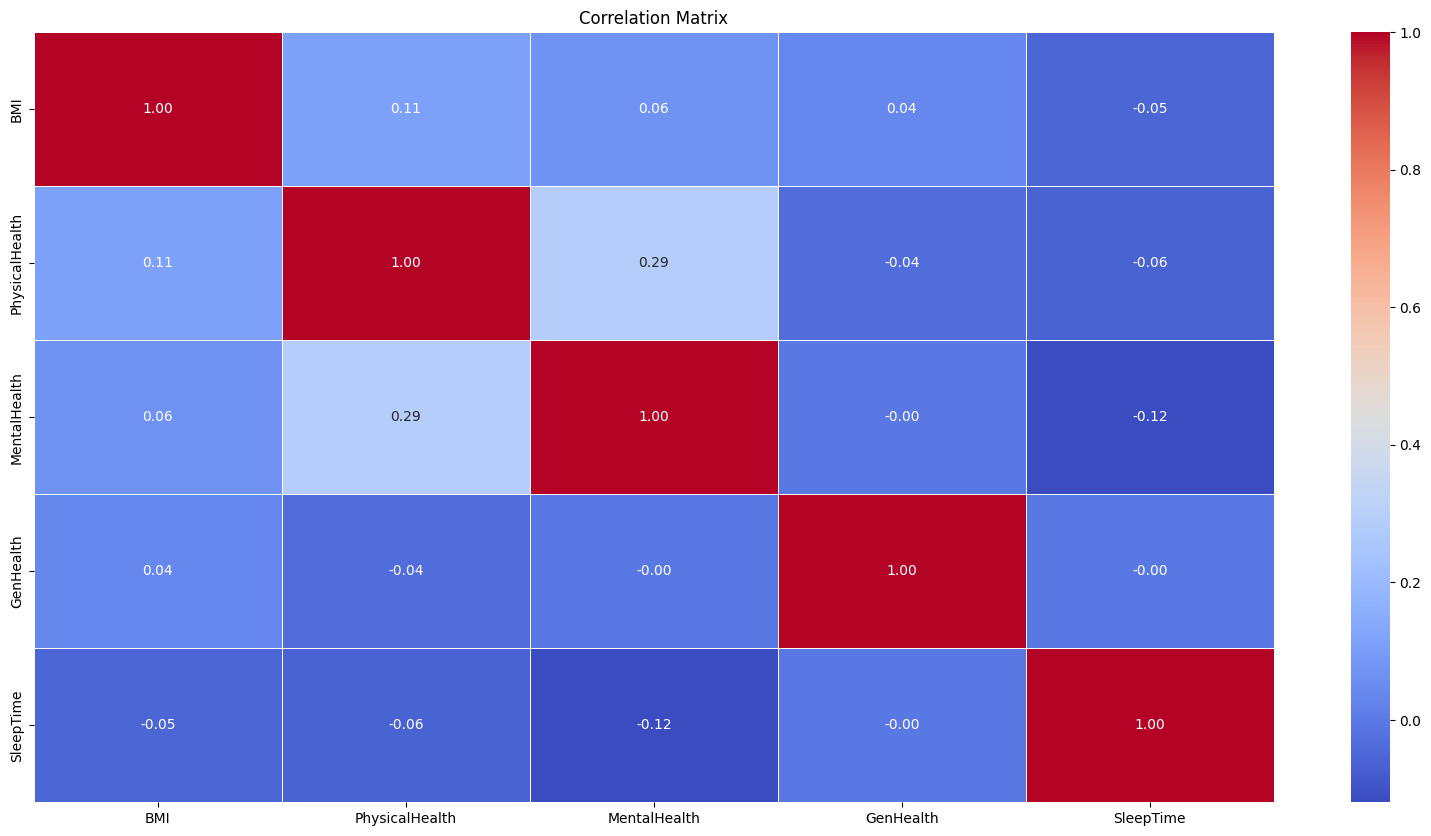

In [ ]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting the correlation matrix of numeric columns only
plt.figure(figsize=(20, 10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

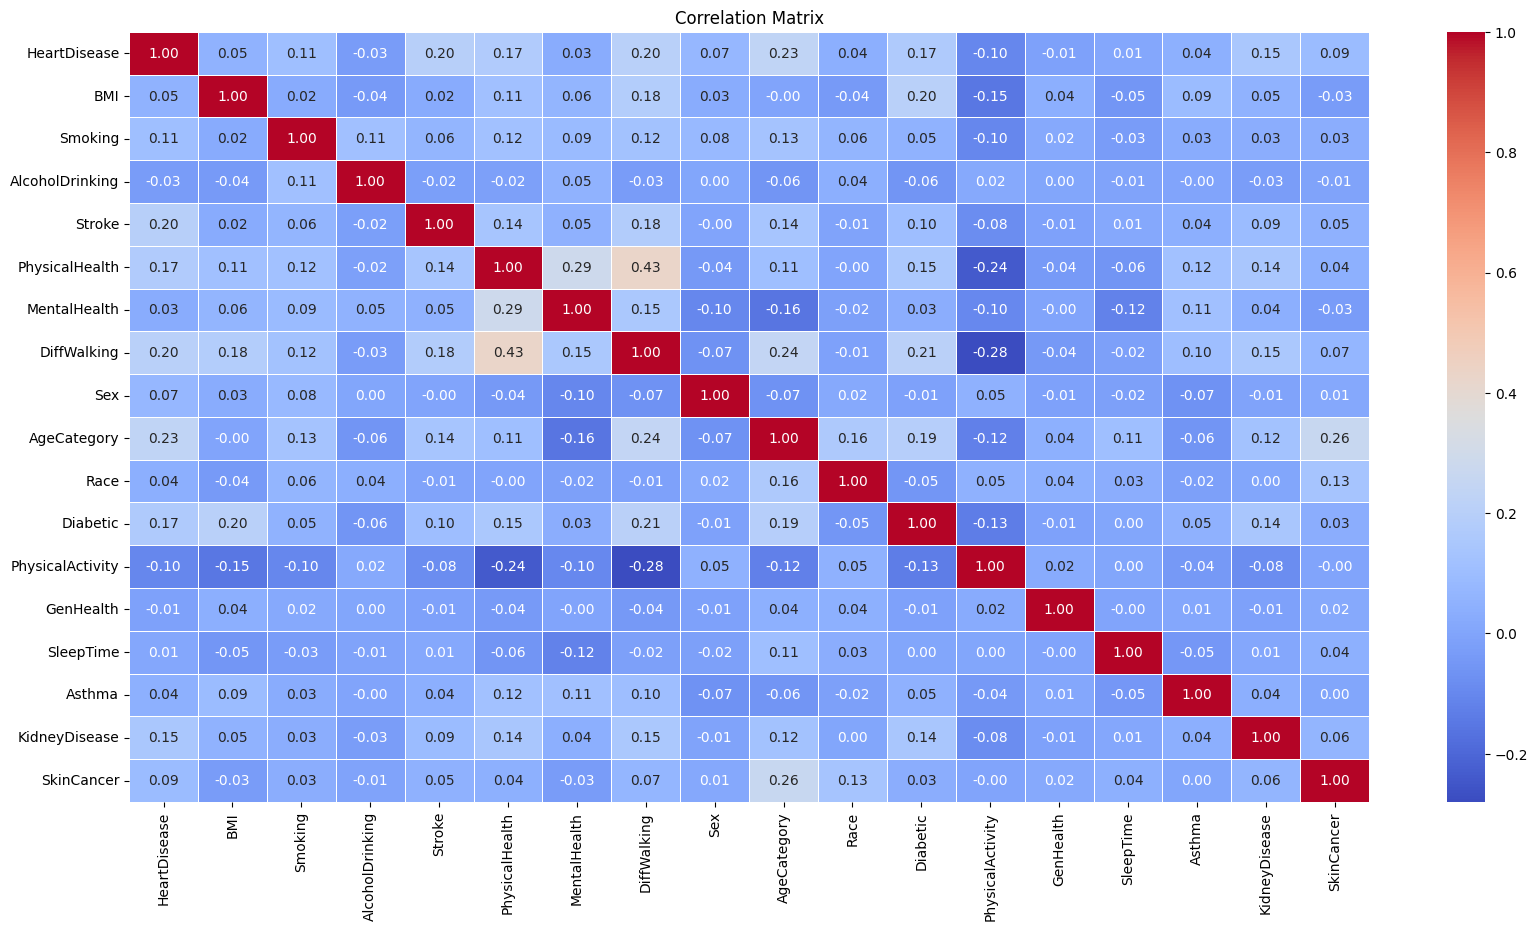

In [ ]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Plotting the correlation matrix of all columns including categorical ones
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

<h3> Observation Correlation Matrix </h3>
<p> It is a big matrix with too many features, we will check the correlation only with respect to 'HeartDisease'. </p>

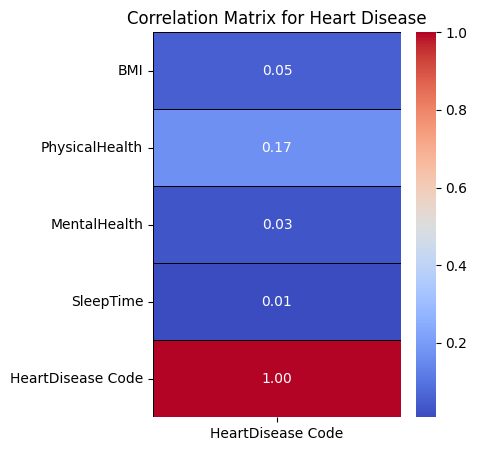

In [ ]:
# Assuming df is your DataFrame and 'HeartDisease' is the target variable
# Encode 'HeartDisease' into a numeric format if it's not already numeric
if df['HeartDisease'].dtype == 'object':
    label_encoder = LabelEncoder()
    df['HeartDisease Code'] = label_encoder.fit_transform(df['HeartDisease'])
else:
    df['HeartDisease Code'] = df['HeartDisease']

# Define a list of numeric columns to include in the correlation matrix
numeric_columns = [
    'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'HeartDisease Code'
]

# Ensure all specified columns are in the DataFrame
missing_cols = [col for col in numeric_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in the DataFrame: {missing_cols}")

# Calculate the correlation matrix for the DataFrame including 'HeartDisease Code'
corr_matrix = df[numeric_columns].corr()

# Isolate the correlation values for 'HeartDisease Code'
disease_correlations = corr_matrix[['HeartDisease Code']]

# Plotting the correlation matrix for 'HeartDisease Code'
plt.figure(figsize=(4, len(disease_correlations.index)))  # Adjust the figure size as needed
sns.heatmap(disease_correlations, annot=True, cmap='coolwarm', cbar=True, fmt=".2f", linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix for Heart Disease')
plt.show()


<p> Except for 'SleepTime' and 'MentalHealth', everyone displays a positive or negative relationship with heart disease. </p>
<h3> Feature selection for categorical features: </h3>
<p>Ref.[12] </p>
<p> Chi Squared Test: </p>

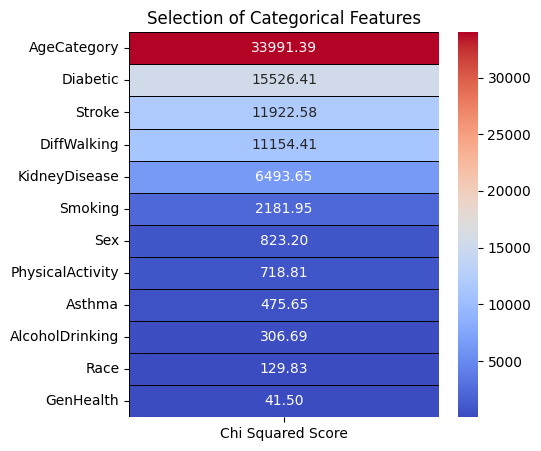

In [ ]:
# Assuming categorical_features is already defined
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                        'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
                        'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Encode categorical features as numeric
encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Defining features and target for testing the chi2
features = df.loc[:, categorical_features[:-1]]  # Assuming the last feature is not the target
target = df['HeartDisease']  # Use 'HeartDisease' as the target variable
target = encoder.fit_transform(target)  # Ensure the target is also encoded if it's categorical

# Applying SelectKBest to select the characteristics with base on test chi2
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

# Criating a DataFrame to visualize the scores of Chi-square
featureScores = pd.DataFrame(data=fit.scores_, index=features.columns, columns=['Chi Squared Score'])

# Plot the scores in a heatmap
plt.subplots(figsize=(5, 5))

# Converting the DataFrame so that the characteristics will be shown in Y-axis and the scores in the X-axis
sns.heatmap(featureScores.sort_values(by='Chi Squared Score', ascending=False), annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features')
plt.show()

In [ ]:
# collab, importing the drive
# from google.colab import drive
# drive.mount('/content/drive')

<p> Except 'GenHeath', all the remaining categorical features are pretty important for predicting heart diseases. </p>
<h3> Feature Selection for Numerical Features: </h3>
<p> Ref.[13]</p>
<p> ANOVA Test: </p>
<p> Which is an analysis of variance, see more details over the reference section. </p>

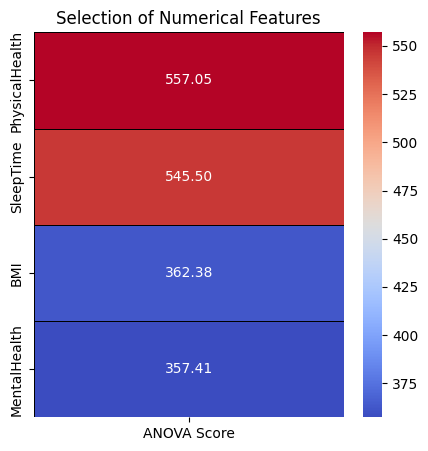

In [ ]:
# Assuming numerical_features and categorical_features are already defined
numerical_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']  # Example numerical features
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                        'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
                        'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Define features and target for the ANOVA test
features = df.loc[:, numerical_features]
target = df.loc[:, categorical_features[-1]]  # Assuming the last categorical feature is the target

# Imputer values not present on the numerical data
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Apply SelectKBest to select the characteristics with base on the ANOVA test
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features_imputed, target)

# Create a DataFrame to show the scores of ANOVA
featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

# Plot the scores in a heatmap
plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(by='ANOVA Score', ascending=False), annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')
plt.show()

<p> We will leave out 'MentalHealth' from the modeling part and take the remaining features. <p>
<h2> Modeling </h2>
<p> Ref.[4] </p>
<p> The code below preprocesses the dataset before training the machine learning model. </p>
<p> <b> Defining features and labels: </b>Separating the features (X) from the target variable or labels (Y). </p>
<p> <b> Splitting the data: </b>The dataset is then divided into training and testing sets using a function (train_test_split), which randomly splits the dataset into subsets for training and testing the model. The parameter 'test_size' specifies the propotion of the dataset to include in the test split, and 'random_state' ensures reproducubility. </p>
<p> <b> Combination of preprocessing: </b>Combination of such steps were done through the 'ColumnTransformer', which applies specified transformations to the respective feature types. </p>
<p> Generally, the code below, makes the data suitable for training the machine learning model. </p>

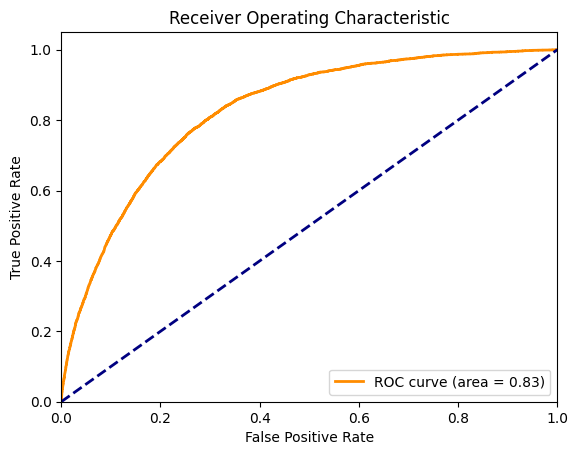

In [ ]:
# Making sure the dataframe is loaded
# Make sure that is the real way for the file
df = pd.read_csv('heart_2020_cleaned.csv')

# Encoding the cathegorical variables
encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = encoder.fit_transform(df[column])

# Share the dataset into characteristics (features) and target
features = df.drop('HeartDisease', axis=1)
target = df['HeartDisease']

# Share the data into training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Training the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Predicting probabilities
y_scores = model.predict_proba(x_test)[:, 1]

# Calculate FPR, TPR, and Thresholds to the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the area for the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<p> Selecting the features above conducted tests and splitting the data into 80 - 20 training - test groups. </p>

In [ ]:
# Function for the classifier model
def model(classifier):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

# Function for the model evaluation
def model_evaluation(classifier):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    # Classification Report Output
    print(classification_report(y_test,classifier.predict(x_test)))

<h3> 1. Logistic Regression: </h3>

Confusion Matrix:
[[58041   471]
 [ 4970   477]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58512
           1       0.50      0.09      0.15      5447

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.89      0.91      0.89     63959

Accuracy: 0.9149298769524227


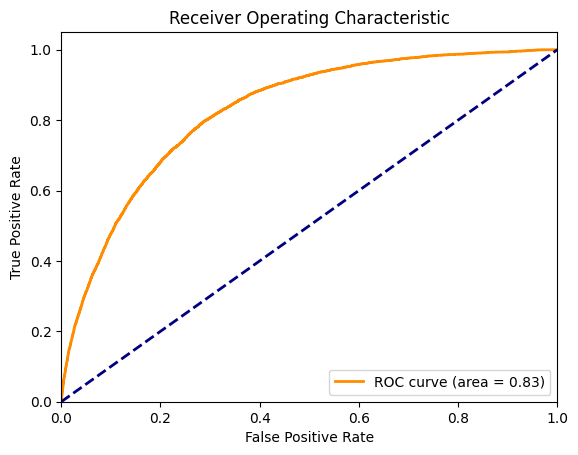

In [ ]:
features = df.drop('HeartDisease', axis=1).values
target = df['HeartDisease'].values

# Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Creating and training the logistic regression model
classifier_lr = LogisticRegression(random_state=0, C=10, penalty='l2', max_iter=1000)
classifier_lr.fit(x_train, y_train)

# Evaluating the model with test data
y_pred = classifier_lr.predict(x_test)
y_scores = classifier_lr.predict_proba(x_test)[:, 1]  # Probabilities for the ROC curve

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculating the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Accuracy: 91.59%
Cross Validation Score (ROC AUC): 84.05%
ROC AUC Score: 83.84%


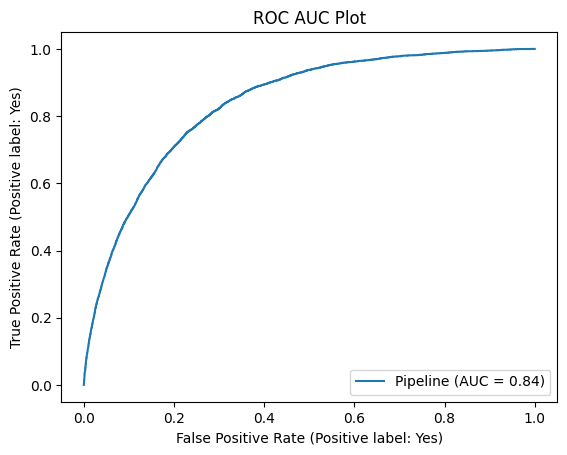

In [ ]:
# Load the data
df = pd.read_csv('heart_2020_cleaned.csv')

# Identify categorical columns (assuming columns with dtype 'object' are categorical)
# Excluding the target column 'HeartDisease' from the categorical columns to be encoded
categorical_cols = df.select_dtypes(include=['object']).columns.drop('HeartDisease')

# Define the preprocessor to encode categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)  # Apply OneHotEncoder to categorical data
    ], remainder='passthrough'  # Include remaining columns that are numeric
)

# Create a pipeline with preprocessor and logistic regression
pipeline = make_pipeline(preprocessor, StandardScaler(), LogisticRegression(random_state=0, C=10, penalty='l2'))

# Splitting the data into features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict probabilities for the positive class
probabilities = pipeline.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, pipeline.predict(X_test))
print("Accuracy: {:.2%}".format(accuracy))

# Setting up repeated stratified k-fold for more stable cross-validation results
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Calculate the ROC AUC score from cross-validation
cv_roc_auc = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc').mean()
print("Cross Validation Score (ROC AUC): {:.2%}".format(cv_roc_auc))

# Calculate the ROC AUC Score
roc_auc = roc_auc_score(y_test, probabilities)
print("ROC AUC Score: {:.2%}".format(roc_auc))

# Plot the ROC Curve using the new method
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.title('ROC AUC Plot')
plt.show()

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Accuracy:  91.61%
Cross Validation Score:  83.99%
ROC AUC Score:  84.29%


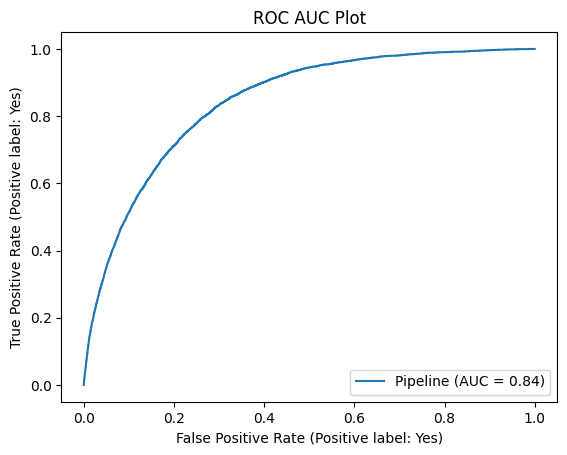

In [ ]:
# Load the dataset
df1 = pd.read_csv('heart_2020_cleaned.csv')

# Review the dataset's columns
print(df1.columns)

# Define the target and feature set
y = df1['HeartDisease']  # Directly use as it's already likely binary encoded
X = df1.drop(['HeartDisease'], axis=1)

# Define categorical columns for encoding
categorical_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
                    'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Create a preprocessor with OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Create a pipeline with preprocessor and logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=0, C=10, penalty='l2', max_iter=1000))
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

# Train the logistic regression classifier
pipeline.fit(X_train, y_train)

# Predict probabilities for the test set
y_scores = pipeline.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC Score
roc_auc = roc_auc_score(y_test, y_scores)

# Displaying results
print("Accuracy: ", '{:.2%}'.format(accuracy_score(y_test, pipeline.predict(X_test))))
print("Cross Validation Score: ", '{:.2%}'.format(cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc').mean()))
print("ROC AUC Score: ", '{:.2%}'.format(roc_auc))

# Plotting the ROC curve using the new method RocCurveDisplay.from_estimator
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.title('ROC AUC Plot')
plt.show()

<h3> 2. Decision Trees: </h3>

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Accuracy:  91.54%
Cross Validation Score:  72.86%
ROC AUC Score:  73.67%


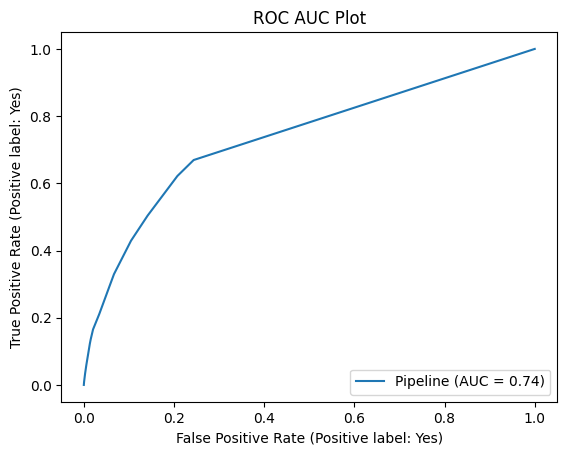

In [ ]:
# Load the dataset
df1 = pd.read_csv('heart_2020_cleaned.csv')

# Confirm the column names, especially for the target diagnosis and numeric variables
print(df1.columns)

# Define the target and feature set
y = df1['HeartDisease']  # Directly use as it's already likely binary encoded
X = df1.drop(['HeartDisease'], axis=1)

# Define categorical columns for encoding
categorical_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
                    'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Create a preprocessor with OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Create a pipeline with preprocessor and decision tree classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=1000, max_depth=4, min_samples_leaf=1))
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

# Train the decision tree classifier
pipeline.fit(X_train, y_train)

# Predict probabilities for the test set
y_scores = pipeline.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC Score
roc_auc = roc_auc_score(y_test, y_scores)

# Displaying results
print("Accuracy: ", '{:.2%}'.format(accuracy_score(y_test, pipeline.predict(X_test))))
print("Cross Validation Score: ", '{:.2%}'.format(cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc').mean()))
print("ROC AUC Score: ", '{:.2%}'.format(roc_auc))

# Plotting the ROC curve using the new method RocCurveDisplay.from_estimator
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.title('ROC AUC Plot')
plt.show()

<h3> 3. Random Forest: </h3>

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Accuracy:  91.52%
Cross Validation Score:  80.28%
ROC AUC Score:  80.94%


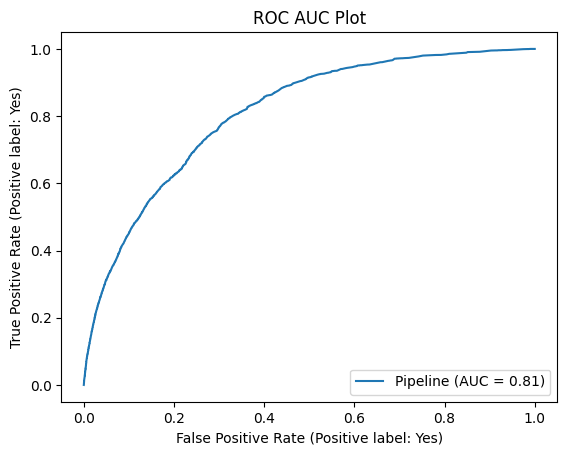

In [ ]:
# Load the dataset
df1 = pd.read_csv('heart_2020_cleaned.csv')

# Confirm the column names
print(df1.columns)

# Define the target and feature set
y = df1['HeartDisease']
X = df1.drop(['HeartDisease'], axis=1)

# Define categorical columns for encoding
categorical_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
                    'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Create a preprocessor with OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Create a pipeline with preprocessor and random forest classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=4, random_state=0))
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

# Train the random forest classifier
pipeline.fit(X_train, y_train)

# Predict probabilities for the test set
y_scores = pipeline.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC Score
roc_auc = roc_auc_score(y_test, y_scores)

# Displaying results
print("Accuracy: ", '{:.2%}'.format(accuracy_score(y_test, pipeline.predict(X_test))))
print("Cross Validation Score: ", '{:.2%}'.format(cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc').mean()))
print("ROC AUC Score: ", '{:.2%}'.format(roc_auc))

# Plotting the ROC curve using the new method RocCurveDisplay.from_estimator
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.title('ROC AUC Plot')
plt.show()

<h3> General Conclusion </h3>
<p> </p>
<p> </p>
<p> </p>
<p> </p>
<p> </p>
<p> </p>

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Logistic Regression Accuracy: 91.61%
Confusion Matrix for Logistic Regression:
 [[58027   503]
 [ 4863   566]]
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

          No       0.92      0.99      0.96     58530
         Yes       0.53      0.10      0.17      5429

    accuracy                           0.92     63959
   macro avg       0.73      0.55      0.57     63959
weighted avg       0.89      0.92      0.89     63959



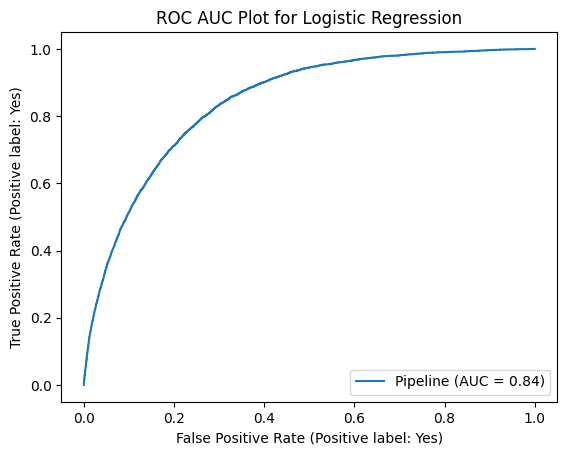

Decision Tree Accuracy: 91.54%
Confusion Matrix for Decision Tree:
 [[58363   167]
 [ 5244   185]]
Classification Report for Decision Tree:
               precision    recall  f1-score   support

          No       0.92      1.00      0.96     58530
         Yes       0.53      0.03      0.06      5429

    accuracy                           0.92     63959
   macro avg       0.72      0.52      0.51     63959
weighted avg       0.88      0.92      0.88     63959



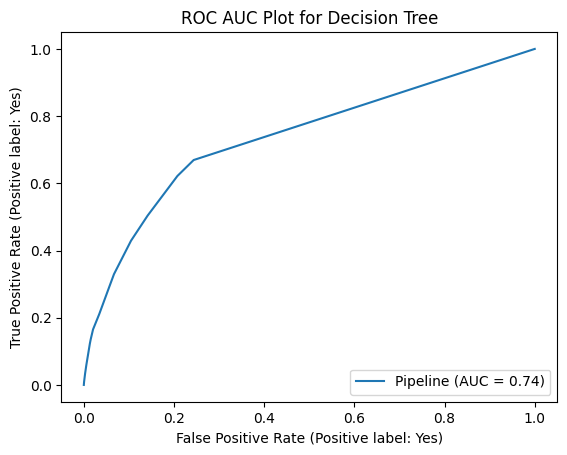

Random Forest Accuracy: 91.52%
Confusion Matrix for Random Forest:
 [[58515    15]
 [ 5407    22]]
Classification Report for Random Forest:
               precision    recall  f1-score   support

          No       0.92      1.00      0.96     58530
         Yes       0.59      0.00      0.01      5429

    accuracy                           0.92     63959
   macro avg       0.76      0.50      0.48     63959
weighted avg       0.89      0.92      0.88     63959



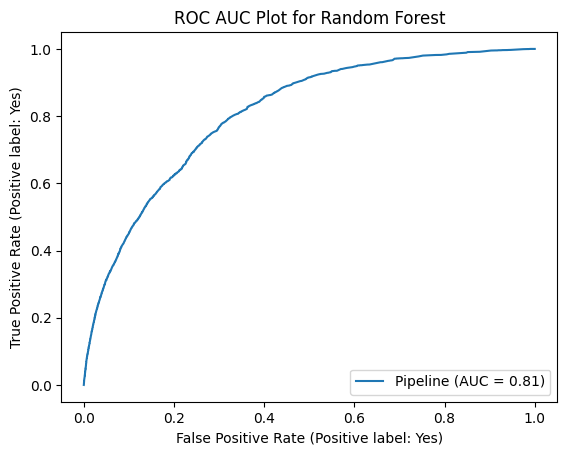

Model Results: {'Logistic Regression': 0.9161025031660908, 'Decision Tree': 0.9153989274378899, 'Random Forest': 0.9152269422598852}


In [ ]:
# Load the dataset
df1 = pd.read_csv('heart_2020_cleaned.csv')

# Confirm the column names
print(df1.columns)

# Define the target and feature set
y = df1['HeartDisease']
X = df1.drop(['HeartDisease'], axis=1)

# Define categorical columns for encoding
categorical_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
                    'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Create a preprocessor with OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=1000, max_depth=4, min_samples_leaf=1),
    'Random Forest': RandomForestClassifier(max_depth=4, random_state=0)
}

# Train and evaluate the models and print results
results = {}
for name, model in models.items():
    # Create a pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate the model
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

    print(f'{name} Accuracy: {accuracy:.2%}')
    print(f'Confusion Matrix for {name}:\n', confusion_matrix(y_test, predictions))
    print(f'Classification Report for {name}:\n', classification_report(y_test, predictions, zero_division=0))

    # Plot ROC Curve
    RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
    plt.title(f'ROC AUC Plot for {name}')
    plt.show()

# Displaying results
print("Model Results:", results)

<h3>Explanation of models and their respective outcomes - Classification model performance </h3>
<p> Ref.[5, 6 & 7] </p>
<p> Generally, the code above imports the required libraries for the model's, then it initilizes the respective models, and lastly trains and evaluate the models outputting the findings, such as Accuracy, Precision Matrix, and Classification Report. </p>
<p> The chosen models were: Logistic Regression, Decision Tree, and Random Forest, see details below. </p>
<p> <b>Logistic Regression: </b>with accuracy of 91.61%, represent the corretly classified instances out of the total of the instances. </p>
<p> The cross validation score of 83.99%, which is the average obtained from cross-validating, which indicates how well the model generalizes to unseen data. </p>
<p> ROC AUC Score of 84.29%, which is the are under the receiver operating characteristics curve, measured the model ability to distinguish between positive and negative classes. <p>
<p> Classification Report, provided precision, recall, and F1-score for both classes (yes and no), see the output table for further details </p>
<p> <b>Decision Tree: </b> With accuracy of 91.54%, similar to logistic regression, it presents the percentage of correctly classified instances. </p>
<p> Cross validation Score of 72.86%, lower compared to logistic regression, which might indicate potential overfitting or poor generalisation. </p>
<p> ROC AUC score of 73.67%, lower than logistic regression, suggesting less ability to discriminate between classes. </p>
<p> <b>Random Forest: </b> Accuracy of 91.52%, close to logistic regression, indicating a good overall performance. </p>
<p> Cross Validation Score of 80.28%, higher than decision tree but lower than logistic regression. </p>
<p> ROC AUC score of 80.19%, also higher than decision tree, but still lower than logistic regression.</p>
<p> <b> Generally: </b>Considering the task of predicting disease risk (in the given case, predicting heart disease) the model's ability to corretly identify positive cases (heart dissease) is crucial. In this context, the <b> logistic regression</b> model outperformes the other models, in terms of precision, recall, and F1-score for the 'yes' class. It achieves balanced performance in predicting both positive and negative cases, with relatively high accuracy and ROC AUC (Area Under the Curve) score, which focuses on fiding the erros and benefits classifiers use to organize classes. Therefore, based on those findings, the logistic regression model appears to be the most suitable for the case studied. </p>

In [ ]:
# Load the original dataset
df = pd.read_csv('heart_2020_cleaned.csv')

# Define categorical features and target variable
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                        'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
                        'KidneyDisease', 'SkinCancer', 'AgeCategory']
target_variable = 'HeartDisease'

# Encode categorical features as numeric
encoder_dict = {}
for feature in categorical_features:
    encoder = LabelEncoder()
    df[feature] = encoder.fit_transform(df[feature])
    encoder_dict[feature] = encoder

# Define features and target
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Load the user data
user_data = pd.read_csv('users_data.csv')

# Encode the categorical features in the user data
for feature in categorical_features:
    user_data[feature] = encoder_dict[feature].transform(user_data[feature])

# Ensure the user data has the same columns as the training data (excluding 'HeartDisease')
user_data = user_data[X.columns.tolist() + ['User']]

# Select a random user
random_user = user_data.sample(n=1, random_state=random.randint(1, 100)).drop(columns=['User'])

# Predict the heart disease risk for the selected user
prediction_proba = model.predict_proba(random_user)
prediction = (prediction_proba[0][1] >= 0.5).astype(int)  # Adjust prediction logic

# Output the result
user_name = user_data.loc[random_user.index[0], 'User']
probability_percent = prediction_proba[0][1] * 100  # Convert to percentage
print(f"User: {user_name}")
print(f"Prediction: {'Heart Disease' if prediction else 'No Heart Disease'}")
print(f"Probability of Heart Disease: {probability_percent:.0f}%")
print("\n")

# Debug: Display the selected user's data and prediction probability
print(f"Selected user data:\n{random_user}")
print("\n")
print(f"Prediction probability: {prediction_proba}")
print("\n")

# Visualize all user probabilities
all_user_probas = model.predict_proba(user_data.drop(columns=['User']))
print("\n")
user_data['HeartDisease Probability (%)'] = all_user_probas[:, 1] * 100
print(user_data[['User', 'HeartDisease Probability (%)']])

User: Laura
Prediction: No Heart Disease
Probability of Heart Disease: 1%


Selected user data:
     BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
7  24.21        0                0       0             3.0           0.0   

   DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  GenHealth  \
7            0    0            6     2         0                 1          2   

   SleepTime  Asthma  KidneyDisease  SkinCancer  
7        8.0       0              0           0  


Prediction probability: [[0.98570657 0.01429343]]




     User  HeartDisease Probability (%)
0  Peter                      45.254367
1    John                     26.228192
2   Marry                      9.707471
3   Gracy                     10.422129
4    Rose                     39.884694
5    Paul                     15.743204
6    Mark                     17.345657
7   Laura                      1.429343


<h3> Explanation of the prediction </h3>
<p> The logistic regression model, integrated into the health tracking and disease prediction application, offers personalized insights into heart disease risk factors based on user inputs. For individuos like the run time above. Random generation, in this case for 'Laura', it provides reassurance by indicating a low probability of heart disease, fostering proactive health management. Heathcare professionals will also benefit from actionable insights, aiding in early disease detection and intervention strategies. Overall, the model empowers users and enhances cardiovascular health monitoring. </p>
<p> For testing purposes on the deployment phase, we will be using an fictional dataset to be making predictions, as if the user had input those, so then there will be the integration of a separated dataset, where the fictional data will be stored, so each time that the predictions will be made, we will be able to gather a new output, due to the random selection of the user over the ‘user_data’ dataset, which is where the information will be gathered, rather than the actual submission of a form, as said over the final prototype project.
</p>

<h4> Making use of Dashboards * Further Improvement *</h4>
<p> For creating the dashboards in this project, we made use of some tools like Plotly. We designed dashboards to display user input data, visualize trends in gender, exercises, and lifestyle habits, and present predictive analytics for disease risk assessment. The following dashboards provide users with a comprehensive overview of their health status, and a proactive management for the insights. Further dashboards might be implemented for user interaction and user interface implementation. </p>

<h4> Machine Learning - Classification Model </h4>
<p> Ref.[14 & 15]</p>
<p> The chosen model is <b> Logistic Regression Model </b>, which outperforms the other models in terms of precision, recall, and F1-score for the 'yes' class. It achieves a balanced performance in predicting both positive and negative cases with a relatively high accuracy and ROC AUC score. </p>
<p> Due to its probability estimation, such as calculation of an event (in this case, being diagnosed with the heart disease). This probability estimation allows an understanding of the likelihood of the disease occurence, enabling healthcare providers to make informed decisions regarding intervention and treatments.</p>

<h4> Addition of a dataset, it will be used for the disease (heart) prediction along with user gathered data </h4>
<p> Ref.[16] </p>
<p> The chosen extra dataset 'heart_2020_cleaned.csv' would be used alongside a user dataset storage 'user_data.csv', for better usage of the features available, as well as making certain predictions, we also would need to create a separate dataset and merge again, with user personal and health information, to be integrated over the user interaction step. </p>
<p> As previously explained, this prototype will only explain the basics of the prediction and potential of the application, further improvements can be done in future implementations of steps, for this initial analysis we only tested initial idea of the project, diving a bit deeper over the possibility of application improvement to make the idea more tangible and acceptable to the project. </p>

<h2>References </h2>
<p> 1. Data Collection and Data Preprocessing in Machine Learning with Python. Turing.com. Available from: <a> https://www.turing.com/kb/how-data-collection-and-data-preprocessing-in-python-help-in-machine-learning </a> [accessed 28 April 2024]. </p>
<p> 2. R., J. (2023). 1. Data Collection using python. Medium.com. Available from: <a> https://medium.com/@renrihui8415/1-data-collection-using-python-a31a7417d422 </a> [accessed 28 April 2024].</p>
<p> 3.  Madendere Barın, G. (2024). Effective Data Cleaning Strategies in Python for Exploratory Data Analysis (EDA). Medium.com. Available from: <a> https://medium.com/@gozdemadendere/effective-data-cleaning-strategies-in-python-for-exploratory-data-analysis-eda-c9025d5f35e4 </a> [accessed 28 April 2024]. </p>
<p> 4. Chaitanya, N. (2023). Critical steps to training and evaluating AI and ML models. columbus.com. Available from: <a> https://www.columbusglobal.com/en/blog/critical-steps-to-training-and-evaluating-ai-and-ml-models </a> [accessed 30 April 2024]. </p>
<p> 5. What is Logistic Regression? IBM.  Available from: <a> https://www.ibm.com/topics/logistic-regression </a> [accessed 30 April 2024]. </p>
<p> 6. Decision Trees for Decision Making. Harvard Bussiness Review. Available from: <a> https://hbr.org/1964/07/decision-trees-for-decision-making </a> [accessed 30 April 2024]. </p>
<p> 7. Random Forest. h2o.ai. Available from: <a> https://h2o.ai/wiki/random-forest/ </a> [accessed 30 April 2024]. </p>
<p> 8. (2020). pandas.DataFrame.T()function in Python. Geeksforgeeks.org. Available from: <a> https://www.geeksforgeeks.org/pandas-dataframe-t-function-in-python/ </a> [accesed 10 May 2024]</p>
<p> 9. How Race and Ethnicity Impact Heart Disease. my.clevelandclinic.org. Available from: <a> https://my.clevelandclinic.org/health/articles/23051-ethnicity-and-heart-disease. </a> [accessed 11 May 2024] </p>
<p> 10. Antipolis, S. (2023). World’s largest study shows the more you walk, the lower your risk of death, even if you walk fewer than 5,000 steps. www.escardio.org. Available at <a> https://www.escardio.org/The-ESC/Press-Office/Press-releases/World-s-largest-study-shows-the-more-you-walk-the-lower-your-risk-of-death-even-if-you-walk-fewer-than-5-000-steps. </a> [accessed 12 May 2024]. </p>
<p> 11. Chen, J. (2024). Nomal Distribution: What It Is, Uses, and Formula. Investopedia. Available from:<a> https://www.investopedia.com/terms/n/normaldistribution.asp#:~:text=Normal%20distribution%2C%20also%20known%20as,data%20far%20from%20the%20mean. </a> [accessed 11 May 2024]. </p>
<p> 12. Biswal, A. (2023). What is a Chi-Square Test? Formula, Examples & Application. Simplilearn. Available from: <a> https://www.simplilearn.com/tutorials/statistics-tutorial/chi-square-test#:~:text=The%20chi%2Dsquare%20test%20is%20a%20statistical%20tool%20used%20to,variables%20have%20a%20meaningful%20association. </a> [accessed 13 May 2024]. </p>
<p> 13. What is ANOVA (Analysis Of Variance) and what can I use it for?. Qualtrics. Available from: <a> https://www.qualtrics.com/uk/experience-management/research/anova/ </a> [accessed 13 Mayy 2024].</p>
<p> 14. Deshpande, T. (2022). Heart Failure Prediction: CV Score (90%+)| 5 Models. Kaggle. Available from: <a> https://www.kaggle.com/code/tanmay111999/heart-failure-prediction-cv-score-90-5-models </a> [accessed 14 May 2024]. </p>
<p> 15. Simplilearn. (2023). Heart Disease Prediction Using Machine Learning | Cardiovascular Disease Prediction | Simplilearn. youtube. Available from: <a> https://www.youtube.com/watch?v=tSBAag6lAQo&ab_channel=Simplilearn </a> [accessed 15 May 2024]. </p>
<p> 16. Gathered <b> dataset</b>: Pytlak, K. (2023). Indicators of Heart Disease (2022 UPDATE). kaggle.com. Available from: <a> https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease </a> [Accessed 14 May 2024]. </p>
